- this notebook is only run the select the specified signals given the indexes.


In [2]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os


file_name = "C://Users//alper//Desktop//lectures//AIN427//project//data//merge.hdf5"
csv_file = "C://Users//alper//Desktop//lectures//AIN427//project//data//merge.csv"


total = pd.read_csv(csv_file)

sample = pd.read_csv("data//sampled_metadata.csv")

sample.set_index("Unnamed: 0", inplace=True)

total.head()

C:\Users\alper\AppData\Local\Temp\ipykernel_35412\2579852650.py:12: DtypeWarning: Columns (7,11,13,14,24,25,26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  total = pd.read_csv(csv_file)


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


In [3]:
sample['trace_name'] = total.loc[sample.index, 'trace_name']

sample.head()

,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m
Unnamed: 0,,,,,,,,,
235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.8889,-117.1051,150.0
235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.8889,-117.1051,150.0
235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.8889,-117.1051,150.0
235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.8889,-117.1051,150.0
235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.8889,-117.1051,150.0


In [4]:
sample.to_csv("data//sampled_metadata_with_trace_names.csv")

In [5]:
data = pd.read_csv("data//sampled_data.csv")

print(data.head())

   Unnamed: 0  p_arrival_sample p_status  p_travel_sec  s_arrival_sample  \
0      235427             600.0   manual     16.879999            1763.0   
1      235432             900.0   manual     17.870001            2184.0   
2      235434             800.0   manual     17.980000            2062.0   
3      235437             900.0   manual     16.799999            2041.0   
4      235441             900.0   manual     17.160000            2092.0   

     s_status source_id  source_latitude  source_longitude  source_depth_km  \
0      manual   8860238          32.7077         -116.0446             9.20   
1      manual   9084320          32.8297         -115.9531             2.10   
2      manual   9443508          32.8327         -115.9672             2.06   
3      manual  11499016          33.2446         -116.1336             8.38   
4  autopicker  11926498          32.7322         -116.0594             6.61   

   source_magnitude source_magnitude_type  source_distance_km  \
0  

In [6]:
## join data and sample using 'Unnamed: 0' as index
merged = sample.join(data.set_index('Unnamed: 0'), on='Unnamed: 0')
print(merged.shape)
merged.head()

(29989, 24)


,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,...,source_id,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.8889,-117.1051,150.0,600.0,...,8860238,32.7077,-116.0446,9.20,4.3,mb,101.34,281.7,[65. 65.5 61.40000153],[[5508.]]
235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.8889,-117.1051,150.0,900.0,...,9084320,32.8297,-115.9531,2.10,4.1,ml,108.03,273.8,[55. 56.09999847 43.20000076],[[3199.]]
235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.8889,-117.1051,150.0,800.0,...,9443508,32.8327,-115.9672,2.06,3.9,ml,106.69,273.7,[49. 48. 39.20000076],[[5252.]]
235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.8889,-117.1051,150.0,900.0,...,11499016,33.2446,-116.1336,8.38,4.2,ml,98.93,246.8,[65. 68.19999695 58.70000076],[[2866.]]
235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.8889,-117.1051,150.0,900.0,...,11926498,32.7322,-116.0594,6.61,4.3,ml,99.46,280.3,[60.09999847 64.80000305 53.40000153],[[5848.]]


In [7]:
merged.to_csv("data//final_sampled_metadata.csv")

merged = pd.read_csv("data//final_sampled_metadata.csv")

merged.head()

,Unnamed: 0,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m,...,source_id,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample
0,235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.8889,-117.1051,150.0,...,8860238,32.7077,-116.0446,9.20,4.3,mb,101.34,281.7,[65. 65.5 61.40000153],[[5508.]]
1,235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.8889,-117.1051,150.0,...,9084320,32.8297,-115.9531,2.10,4.1,ml,108.03,273.8,[55. 56.09999847 43.20000076],[[3199.]]
2,235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.8889,-117.1051,150.0,...,9443508,32.8327,-115.9672,2.06,3.9,ml,106.69,273.7,[49. 48. 39.20000076],[[5252.]]
3,235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.8889,-117.1051,150.0,...,11499016,33.2446,-116.1336,8.38,4.2,ml,98.93,246.8,[65. 68.19999695 58.70000076],[[2866.]]
4,235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.8889,-117.1051,150.0,...,11926498,32.7322,-116.0594,6.61,4.3,ml,99.46,280.3,[60.09999847 64.80000305 53.40000153],[[5848.]]


total events in csv file: 29989
total events selected: 29989
109C.TA_20061103155652_EV (1 of 29989)


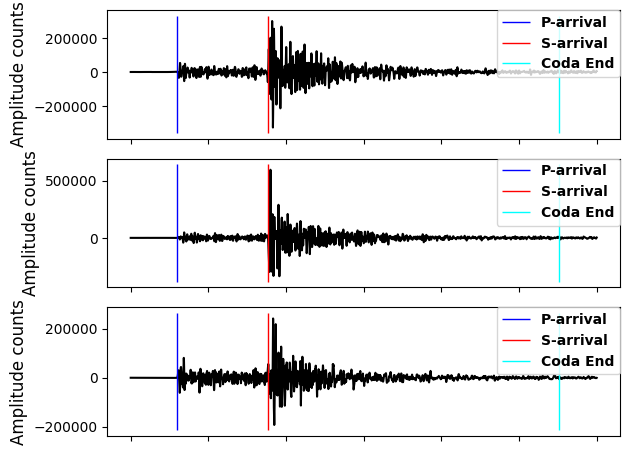

back_azimuth_deg 281.7
coda_end_sample [[5508.]]
network_code TA
p_arrival_sample 600.0
p_status manual
p_travel_sec 16.8799991607666
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 1763.0
s_status manual
s_weight 0.5
snr_db [65.         65.5        61.40000153]
source_depth_km 9.2
source_depth_uncertainty_km None
source_distance_deg 0.91
source_distance_km 101.34
source_error_sec 0.899
source_gap_deg 37.593
source_horizontal_uncertainty_km 2.9542
source_id 8860238
source_latitude 32.7077
source_longitude -116.0446
source_magnitude 4.3
source_magnitude_author None
source_magnitude_type mb
source_mechanism_strike_dip_rake None
source_origin_time 2006-11-03 15:56:42.73
source_origin_uncertainty_sec 0.24
trace_category earthquake_local
trace_name 109C.TA_20061103155652_EV
trace_start_time 2006-11-03 15:56:53.610000
109C.TA_20061129211102_EV (2 of 29989)


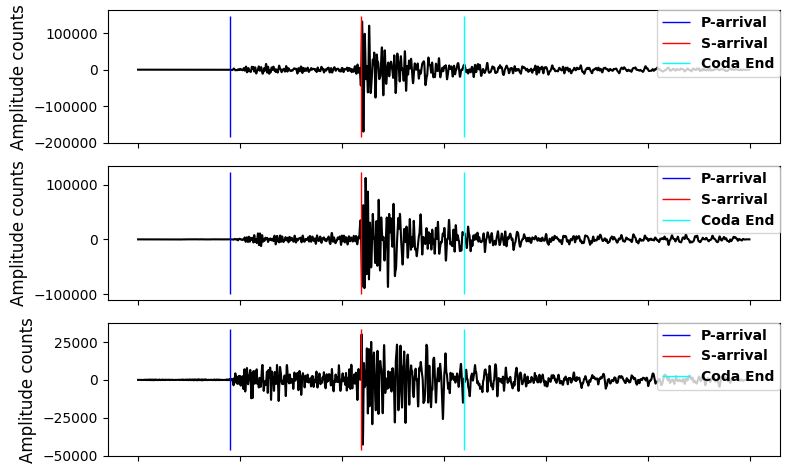

back_azimuth_deg 273.8
coda_end_sample [[3199.]]
network_code TA
p_arrival_sample 900.0
p_status manual
p_travel_sec 17.8700008392334
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 2184.0
s_status manual
s_weight 0.5
snr_db [55.         56.09999847 43.20000076]
source_depth_km 2.1
source_depth_uncertainty_km None
source_distance_deg 0.97
source_distance_km 108.03
source_error_sec 0.9905
source_gap_deg 45.342
source_horizontal_uncertainty_km 2.948
source_id 9084320
source_latitude 32.8297
source_longitude -115.9531
source_magnitude 4.1
source_magnitude_author None
source_magnitude_type ml
source_mechanism_strike_dip_rake None
source_origin_time 2006-11-29 21:10:55.02
source_origin_uncertainty_sec 0.3
trace_category earthquake_local
trace_name 109C.TA_20061129211102_EV
trace_start_time 2006-11-29 21:11:03.890000
109C.TA_20061129221547_EV (3 of 29989)


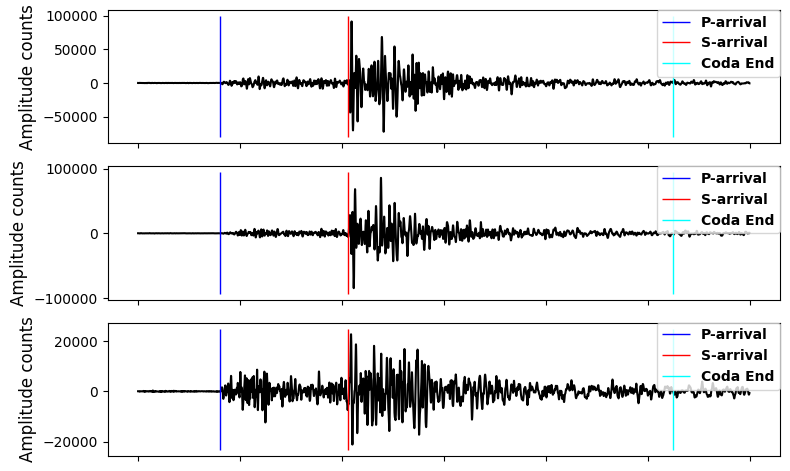

back_azimuth_deg 273.7
coda_end_sample [[5252.]]
network_code TA
p_arrival_sample 800.0
p_status manual
p_travel_sec 17.979999542236328
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 2062.0
s_status manual
s_weight 0.5
snr_db [49.         48.         39.20000076]
source_depth_km 2.06
source_depth_uncertainty_km None
source_distance_deg 0.96
source_distance_km 106.69
source_error_sec 0.9011
source_gap_deg 44.847
source_horizontal_uncertainty_km 2.4481
source_id 9443508
source_latitude 32.8327
source_longitude -115.9672
source_magnitude 3.9
source_magnitude_author None
source_magnitude_type ml
source_mechanism_strike_dip_rake None
source_origin_time 2006-11-29 22:15:38.65
source_origin_uncertainty_sec 0.27
trace_category earthquake_local
trace_name 109C.TA_20061129221547_EV
trace_start_time 2006-11-29 22:15:48.630000
109C.TA_20070209033349_EV (4 of 29989)


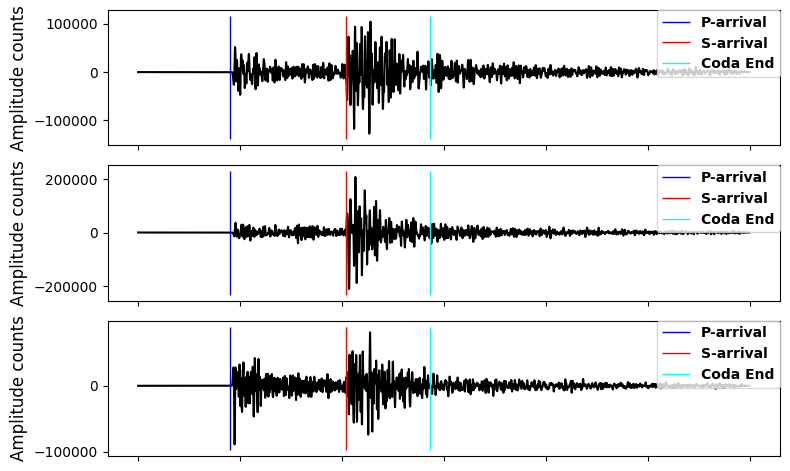

back_azimuth_deg 246.8
coda_end_sample [[2866.]]
network_code TA
p_arrival_sample 900.0
p_status manual
p_travel_sec 16.799999237060547
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 2041.0
s_status manual
s_weight 0.5
snr_db [65.         68.19999695 58.70000076]
source_depth_km 8.38
source_depth_uncertainty_km None
source_distance_deg 0.89
source_distance_km 98.93
source_error_sec 1.115
source_gap_deg 27.81
source_horizontal_uncertainty_km 2.2574
source_id 11499016
source_latitude 33.2446
source_longitude -116.1336
source_magnitude 4.2
source_magnitude_author None
source_magnitude_type ml
source_mechanism_strike_dip_rake None
source_origin_time 2007-02-09 03:33:42.80
source_origin_uncertainty_sec 0.24
trace_category earthquake_local
trace_name 109C.TA_20070209033349_EV
trace_start_time 2007-02-09 03:33:50.600000
109C.TA_20070415225732_EV (5 of 29989)


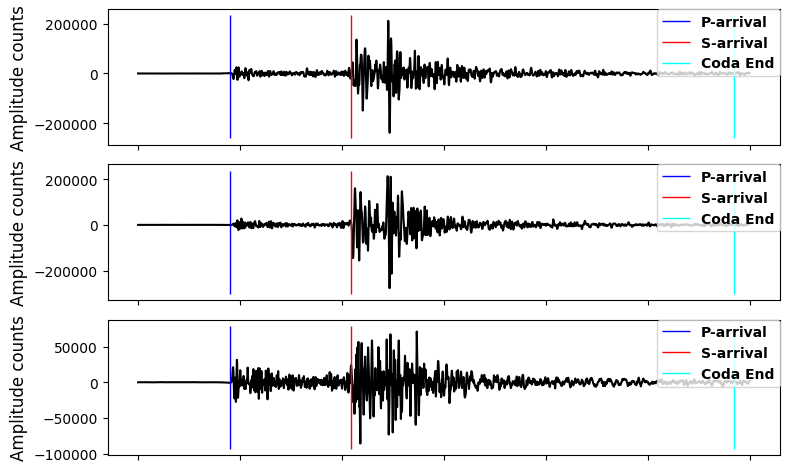

back_azimuth_deg 280.3
coda_end_sample [[5848.]]
network_code TA
p_arrival_sample 900.0
p_status manual
p_travel_sec 17.15999984741211
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 2092.0
s_status autopicker
s_weight 0.5
snr_db [60.09999847 64.80000305 53.40000153]
source_depth_km 6.61
source_depth_uncertainty_km None
source_distance_deg 0.89
source_distance_km 99.46
source_error_sec 1.0571
source_gap_deg 36.929
source_horizontal_uncertainty_km 2.6497
source_id 11926498
source_latitude 32.7322
source_longitude -116.0594
source_magnitude 4.3
source_magnitude_author None
source_magnitude_type ml
source_mechanism_strike_dip_rake None
source_origin_time 2007-04-15 22:57:25.78
source_origin_uncertainty_sec 0.25
trace_category earthquake_local
trace_name 109C.TA_20070415225732_EV
trace_start_time 2007-04-15 22:57:33.940000
109C.TA_20070904144754_EV (6 of 29989)


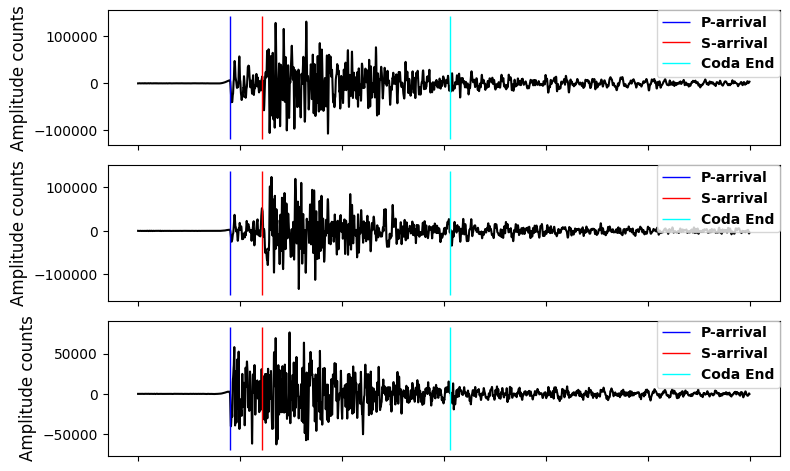

back_azimuth_deg 56.1
coda_end_sample [[3064.]]
network_code TA
p_arrival_sample 900.0
p_status manual
p_travel_sec 4.909999847412109
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 1216.0
s_status manual
s_weight 0.5
snr_db [50.70000076 50.29999924 51.70000076]
source_depth_km 10.0
source_depth_uncertainty_km None
source_distance_deg 0.31
source_distance_km 34.05
source_error_sec 1.2589
source_gap_deg 136.444
source_horizontal_uncertainty_km 2.9612
source_id 12956869
source_latitude 32.7178
source_longitude -117.407
source_magnitude 3.9
source_magnitude_author None
source_magnitude_type mb
source_mechanism_strike_dip_rake None
source_origin_time 2007-09-04 14:47:59.43
source_origin_uncertainty_sec 0.27
trace_category earthquake_local
trace_name 109C.TA_20070904144754_EV
trace_start_time 2007-09-04 14:47:55.340000
109C.TA_20080509223813_EV (7 of 29989)


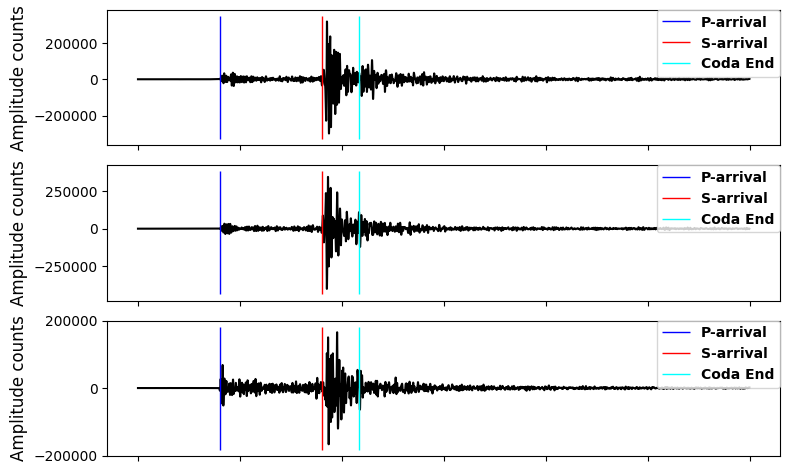

back_azimuth_deg 227.5
coda_end_sample [[2167.]]
network_code TA
p_arrival_sample 800.0
p_status manual
p_travel_sec 15.050000190734863
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 1807.0
s_status manual
s_weight 0.5
snr_db [61.40000153 66.90000153 60.20000076]
source_depth_km 9.67
source_depth_uncertainty_km None
source_distance_deg 0.79
source_distance_km 87.65
source_error_sec 0.9512
source_gap_deg 31.18
source_horizontal_uncertainty_km 2.6055
source_id 10939505
source_latitude 33.4251
source_longitude -116.4148
source_magnitude 4.9
source_magnitude_author None
source_magnitude_type mb
source_mechanism_strike_dip_rake None
source_origin_time 2008-05-09 22:38:07.38
source_origin_uncertainty_sec 0.29
trace_category earthquake_local
trace_name 109C.TA_20080509223813_EV
trace_start_time 2008-05-09 22:38:14.430000
109C.TA_20090129084207_EV (8 of 29989)


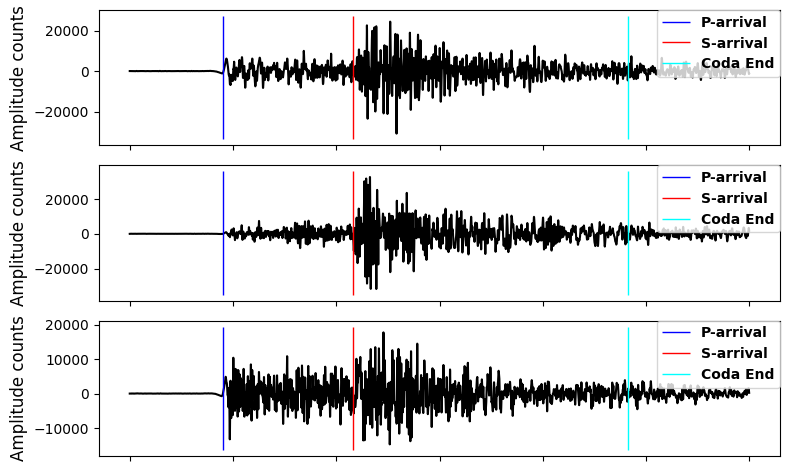

back_azimuth_deg 78.1
coda_end_sample [[4828.]]
network_code TA
p_arrival_sample 900.0
p_status manual
p_travel_sec 18.739999771118164
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 2158.0
s_status manual
s_weight 0.5
snr_db [51.79999924 57.29999924 50.20000076]
source_depth_km 16.0
source_depth_uncertainty_km None
source_distance_deg 0.93
source_distance_km 103.2
source_error_sec 1.4085
source_gap_deg 185.082
source_horizontal_uncertainty_km 5.53864
source_id 11667156
source_latitude 32.7012
source_longitude -118.1842
source_magnitude 4.1
source_magnitude_author None
source_magnitude_type mb
source_mechanism_strike_dip_rake None
source_origin_time 2009-01-29 08:41:58.30
source_origin_uncertainty_sec 0.85
trace_category earthquake_local
trace_name 109C.TA_20090129084207_EV
trace_start_time 2009-01-29 08:42:08.040000
109C.TA_20090416175534_EV (9 of 29989)


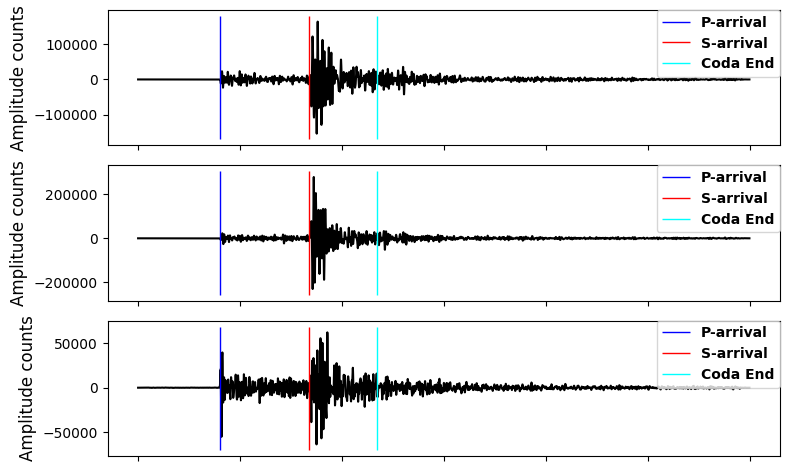

back_azimuth_deg 238.3
coda_end_sample [[2340.]]
network_code TA
p_arrival_sample 800.0
p_status manual
p_travel_sec 12.829999923706055
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 1677.0
s_status manual
s_weight 0.5
snr_db [55.09999847 56.90000153 49.29999924]
source_depth_km 8.22
source_depth_uncertainty_km None
source_distance_deg 0.67
source_distance_km 74.88
source_error_sec 0.7273
source_gap_deg 29.205
source_horizontal_uncertainty_km 3.12549
source_id 12601067
source_latitude 33.2453
source_longitude -116.4241
source_magnitude 4.0
source_magnitude_author None
source_magnitude_type mw
source_mechanism_strike_dip_rake None
source_origin_time 2009-04-16 17:55:30.64
source_origin_uncertainty_sec 0.99
trace_category earthquake_local
trace_name 109C.TA_20090416175534_EV
trace_start_time 2009-04-16 17:55:35.470000
109C.TA_20100201141955_EV (10 of 29989)


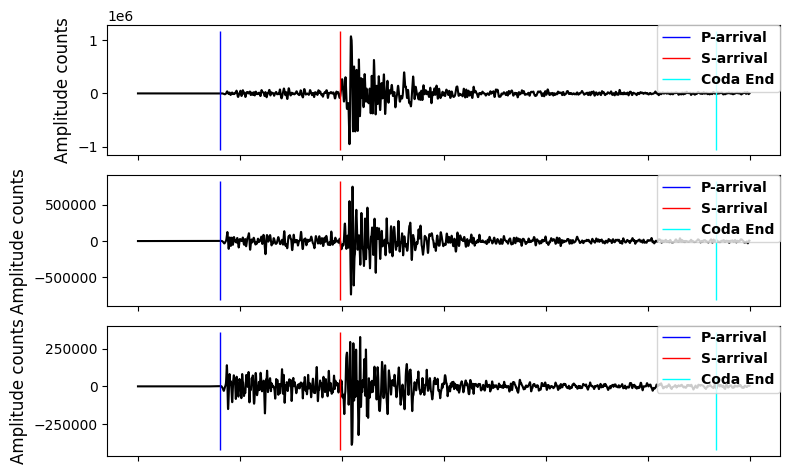

back_azimuth_deg 20.2
coda_end_sample [[5668.]]
network_code TA
p_arrival_sample 800.0
p_status manual
p_travel_sec 15.109999656677246
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 1985.0
s_status manual
s_weight 0.5
snr_db [77.80000305 75.90000153 70.40000153]
source_depth_km 10.0
source_depth_uncertainty_km None
source_distance_deg 0.88
source_distance_km 97.64
source_error_sec 1.7005
source_gap_deg 132.264
source_horizontal_uncertainty_km 6.19343
source_id 14268468
source_latitude 32.0633
source_longitude -117.4662
source_magnitude 4.4
source_magnitude_author None
source_magnitude_type mb
source_mechanism_strike_dip_rake None
source_origin_time 2010-02-01 14:19:49.57
source_origin_uncertainty_sec 0.49
trace_category earthquake_local
trace_name 109C.TA_20100201141955_EV
trace_start_time 2010-02-01 14:19:56.680000
109C.TA_20100309041828_EV (11 of 29989)


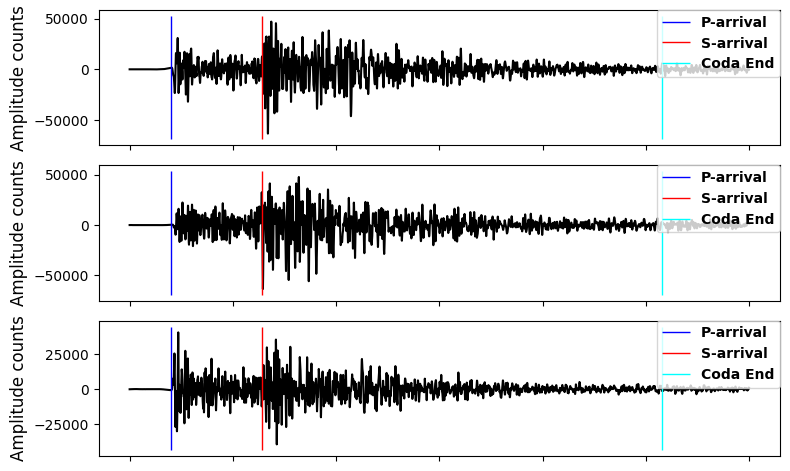

back_azimuth_deg 258.8
coda_end_sample [[5152.]]
network_code TA
p_arrival_sample 400.0
p_status manual
p_travel_sec 12.329999923706055
p_weight 0.5
receiver_code 109C
receiver_elevation_m 150.0
receiver_latitude 32.8889
receiver_longitude -117.1051
receiver_type BH
s_arrival_sample 1279.0
s_status autopicker
s_weight 0.51
snr_db [53.29999924 50.20000076 51.70000076]
source_depth_km 3.25
source_depth_uncertainty_km None
source_distance_deg 0.66
source_distance_km 73.72
source_error_sec 1.4279
source_gap_deg 33.264
source_horizontal_uncertainty_km 2.48965
source_id 14384311
source_latitude 33.0199
source_longitude -116.3321
source_magnitude 4.0
source_magnitude_author None
source_magnitude_type ml
source_mechanism_strike_dip_rake None
source_origin_time 2010-03-09 04:18:20.97
source_origin_uncertainty_sec 1.05
trace_category earthquake_local
trace_name 109C.TA_20100309041828_EV
trace_start_time 2010-03-09 04:18:29.300000


In [8]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os


file_name = "C://Users//alper//Desktop//lectures//AIN427//project//data//merge.hdf5"
csv_file = "data//final_sampled_metadata.csv"


# reading the csv file into a dataframe:
df = pd.read_csv(csv_file)
print(f'total events in csv file: {len(df)}')
print(f'total events selected: {len(df)}')

# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()

# retrieving selected waveforms from the hdf5 file: 
dtfl = h5py.File(file_name, 'r')

i = 0



for c, evi in enumerate(ev_list):
    print(evi, f'({c+1} of {len(ev_list)})')
    dataset = dtfl.get('data/'+str(evi)) 
    # waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel 
    data = np.array(dataset)

    fig = plt.figure()
    ax = fig.add_subplot(311)         
    plt.plot(data[:,0], 'k')
    plt.rcParams["figure.figsize"] = (8, 5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=1, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=1, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=1, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])

    ax = fig.add_subplot(312)         
    plt.plot(data[:,1], 'k')
    plt.rcParams["figure.figsize"] = (8, 5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=1, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=1, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=1, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])

    ax = fig.add_subplot(313)         
    plt.plot(data[:,2], 'k')
    plt.rcParams["figure.figsize"] = (8,5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=1, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=1, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=1, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])
    plt.show() 

    for at in dataset.attrs:
        print(at, dataset.attrs[at]) 
        
    if i<10:
        i += 1
    else:
        break           



- since we will be using a distance based pattern mining algorithm, our signals must have equal length. so that's why we will check our length distribution of signals.



[]

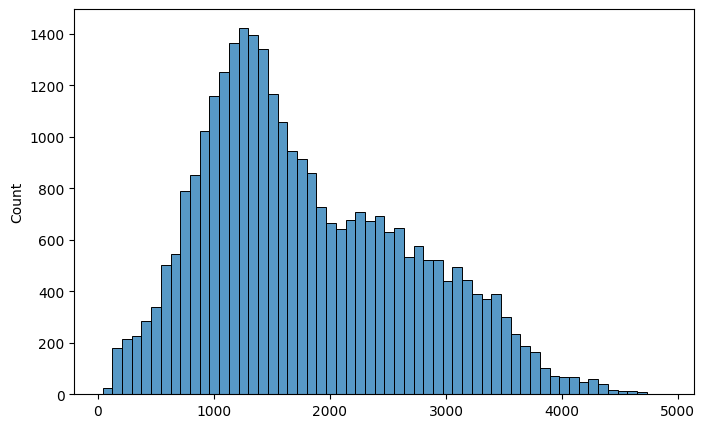

In [9]:
ps_length = df["s_arrival_sample"] - df['p_arrival_sample']

import seaborn as sns

sns.histplot(ps_length)
plt.plot()

In [11]:
ps_length.describe()

count    29989.000000
mean      1812.934856
std        895.708936
min         40.000000
25%       1136.000000
50%       1618.000000
75%       2451.000000
max       4899.000000
dtype: float64

In [15]:
import ast
import numpy as np

def extract_num(x):
    # Case 1: Already an array like [[2697.]]
    if isinstance(x, (list, np.ndarray)):
        return int(float(x[0][0]))
    
    # Case 2: String like '[[2697.]]'
    if isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)  # safely convert string → list
            return int(float(parsed[0][0]))
        except:
            return None  # or np.nan
    
    return None  # fallback

df["coda_end_sample"] = df["coda_end_sample"].apply(extract_num)


[]

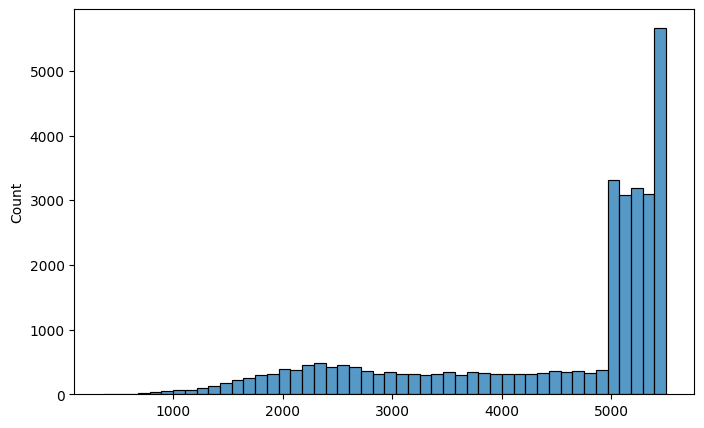

In [16]:
pc_length = df['coda_end_sample'] - df['p_arrival_sample']

sns.histplot(pc_length)
plt.plot()

In [17]:
pc_length.describe()

count    29989.000000
mean      4420.922905
std       1232.099915
min        354.000000
25%       3634.000000
50%       5086.000000
75%       5300.000000
max       5500.000000
dtype: float64

In [22]:
len(pc_length[pc_length>1000]) / len(pc_length)

0.996031878355397

In [21]:
pc_length>2000

0         True
1         True
2         True
3        False
4         True
         ...  
29984     True
29985     True
29986     True
29987     True
29988     True
Length: 29989, dtype: bool

## Mismatch in signal sizes

- As seen above, our signal lengths vary between 354 to 5500 which a broad range. 

- This variable nature of earthquake signals causes some difficulties in pattern mining stage. Since most of the pattern mining algorithms are based on distances, calculating the distance between two different sized signals is unfeasible with standard distance functions such as euclidean. Even if we can compute the distance, it takes much time relative to computing distance between signals which have the same length. 

- Regarding these factors, we decided to sample our signals length to 1000 points. Why 1000? Because only %0.4 of our signals have smaller signal sizes than 1000. This approach loses the real frequency / time information. However, our intention is to find a general view of patterns on these signals so this wouldn't this tradeoff between computational efficiency and global solution can be chosen towards efficiency of computation.


### Additional Steps

- The preprocessing for earthquake signals is listed like this: 
    1. clip the signals from P-arrival to coda_end_sample.
    2. detrendize the signal so there exist no bias towards any trends
    3. resample from coda_end - P-arrival samples to 1000 sample points
    4. apply z-score normalization for a magnitude invariant mining. we care more about the behaviour than the exact, precise amplitude value.




In [28]:
import pandas as pd
import h5py
import numpy as np
from scipy.signal import resample, detrend

# --- CONFIGURATION ---
file_name = "C://Users//alper//Desktop//lectures//AIN427//project//data//merge.hdf5"
csv_file = "data//final_sampled_metadata.csv"
TARGET_LENGTH = 1000 

# --- LOAD METADATA ---
df = pd.read_csv(csv_file)
ev_list = df['trace_name'].to_list()

# --- PREPROCESSING LOOP ---
dtfl = h5py.File(file_name, 'r')

processed_data_list = []
valid_indices = []
dropped_count = 0

print(f"Starting preprocessing with Minimum Length Threshold: {TARGET_LENGTH}...")

for c, evi in enumerate(ev_list):
    try:
        if c%50==0:
            print("Current signal index: ", c)
        
        dataset = dtfl.get('data/' + str(evi))
        data = np.array(dataset)

        p_arrival = int(dataset.attrs['p_arrival_sample'])
        coda_end = int(dataset.attrs['coda_end_sample'])
        
        # Calculate the actual raw duration
        raw_duration = coda_end - p_arrival

        # --- STRICT FILTERING HERE ---
        # 1. Check for valid indices (sanity check)
        if raw_duration <= 10:
            dropped_count += 1
            continue
            
        # 2. Check if signal is too short (Prevent Upsampling)
        if raw_duration < TARGET_LENGTH:
            dropped_count += 1
            continue
        # -----------------------------

        # Slice
        event_slice = data[p_arrival:coda_end, :]

        # Detrend
        event_detrended = detrend(event_slice, axis=0, type='linear')

        # Resample (Now guaranteed to be Downsampling or Equal)
        event_resampled = resample(event_detrended, TARGET_LENGTH, axis=0)

        # Z-Score Normalize
        mean = np.mean(event_resampled, axis=0, keepdims=True)
        std = np.std(event_resampled, axis=0, keepdims=True)
        std[std == 0] = 1.0 
        event_norm = (event_resampled - mean) / std

        # Transpose to (3, 1000)
        processed_data_list.append(event_norm.T)
        valid_indices.append(c)

    except Exception as e:
        print(f"Error on {evi}: {e}")
        continue

dtfl.close()

# --- FINALIZE ---
final_dataset = np.stack(processed_data_list, axis=0)
final_df = df.iloc[valid_indices].reset_index(drop=True)

print("-" * 30)
print(f"Original Count: {len(ev_list)}")
print(f"Dropped (Too Short): {dropped_count}")
print(f"Surviving Events: {len(processed_data_list)}")
print(f"Final Data Shape: {final_dataset.shape}")
print("-" * 30)

Starting preprocessing with Minimum Length Threshold: 1000...
Current signal index:  0


C:\Users\alper\AppData\Local\Temp\ipykernel_35412\1617050317.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coda_end = int(dataset.attrs['coda_end_sample'])


Current signal index:  50
Current signal index:  100
Current signal index:  150
Current signal index:  200
Current signal index:  250
Current signal index:  300
Current signal index:  350
Current signal index:  400
Current signal index:  450
Current signal index:  500
Current signal index:  550
Current signal index:  600
Current signal index:  650
Current signal index:  700
Current signal index:  750
Current signal index:  800
Current signal index:  850
Current signal index:  900
Current signal index:  950
Current signal index:  1000
Current signal index:  1050
Current signal index:  1100
Current signal index:  1150
Current signal index:  1200
Current signal index:  1250
Current signal index:  1300
Current signal index:  1350
Current signal index:  1400
Current signal index:  1450
Current signal index:  1500
Current signal index:  1550
Current signal index:  1600
Current signal index:  1650
Current signal index:  1700
Current signal index:  1750
Current signal index:  1800
Current sign

In [54]:
final_df = df.iloc[valid_indices].reset_index(drop=True)


In [55]:
final_df

,Unnamed: 0,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m,...,source_id,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample
0,235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.88890,-117.1051,150.0,...,8860238,32.7077,-116.0446,9.20,4.3,mb,101.34,281.7,[65. 65.5 61.40000153],[[5508.]]
1,235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.88890,-117.1051,150.0,...,9084320,32.8297,-115.9531,2.10,4.1,ml,108.03,273.8,[55. 56.09999847 43.20000076],[[3199.]]
2,235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.88890,-117.1051,150.0,...,9443508,32.8327,-115.9672,2.06,3.9,ml,106.69,273.7,[49. 48. 39.20000076],[[5252.]]
3,235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.88890,-117.1051,150.0,...,11499016,33.2446,-116.1336,8.38,4.2,ml,98.93,246.8,[65. 68.19999695 58.70000076],[[2866.]]
4,235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.88890,-117.1051,150.0,...,11926498,32.7322,-116.0594,6.61,4.3,ml,99.46,280.3,[60.09999847 64.80000305 53.40000153],[[5848.]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29866,1264972,YHH.WY_20150104073447_EV,WY,YHH,HH,2015-01-04 07:34:13.35,2015-01-04 07:34:48.270000,44.78833,-110.8505,2717.0,...,606490591,44.6018,-114.2846,10.00,4.1,mb,272.97,84.4,[44.5 54.40000153 43.79999924],[[5900.]]
29867,1265330,YHL.WY_20140330123437_EV,WY,YHL,HH,2014-03-30 12:34:41.79,2014-03-30 12:34:38.860000,44.85090,-111.1830,2691.0,...,604373862,44.7700,-110.6643,3.51,4.9,mw,42.01,282.5,[86.5 90.09999847 85.5 ],[[5900.]]
29868,1265331,YHL.WY_20140330123442_EV,WY,YHL,HH,2014-03-30 12:34:41.79,2014-03-30 12:34:43.860000,44.85090,-111.1830,2691.0,...,604373862,44.7700,-110.6643,3.51,4.9,mw,42.01,282.5,[86.80000305 79.09999847 69.09999847],[[3097.]]
29869,1265335,YHL.WY_20140413000513_EV,WY,YHL,HH,2014-04-13 00:04:41.15,2014-04-13 00:05:14.920000,44.85090,-111.1830,2691.0,...,604453043,44.6148,-114.2974,5.00,4.8,mb,248.07,82.8,[80.30000305 78.90000153 73.59999847],[[5900.]]


In [56]:
final_dataset

array([[[ 4.90138717e-02, -3.84465307e-02, -2.89803475e-01, ...,
          1.39566094e-01,  2.36563131e-01,  2.24710003e-01],
        [ 3.88952601e-03, -5.64004469e-04,  6.37724400e-02, ...,
          1.31732702e-01,  1.86503172e-01,  4.74298410e-02],
        [ 1.29536346e-01,  2.30740577e-01,  8.45211446e-01, ...,
          5.36419377e-02,  1.14176482e-01,  7.35082030e-02]],

       [[ 1.71196163e-01, -6.49894997e-02,  8.30473751e-03, ...,
          4.99909312e-01,  5.25327981e-01,  6.58230245e-01],
        [ 1.44380420e-01, -3.47860716e-02,  1.71638895e-02, ...,
          5.00379682e-01,  4.41877216e-01,  5.13639688e-01],
        [ 1.85969062e-02,  6.07343651e-02,  7.61470720e-02, ...,
         -1.50338864e+00, -9.62923706e-01, -3.28485012e-01]],

       [[-3.12494044e-03,  2.50156019e-02,  1.14252008e-02, ...,
          1.06195323e-01,  1.82414532e-01,  6.38322905e-02],
        [-4.49188240e-02,  2.56382185e-03, -1.63524393e-02, ...,
          2.13437416e-02, -6.55909814e-03, -6.439

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Save the 3D array
np.save("signal_data/processed_seismic_data.npy", final_dataset)

# Save the filtered metadata (CRITICAL step, so rows match the data)
final_df.to_csv("data/processed_metadata.csv", index=False)

print("Saved .npy and .csv files successfully.")

NameError: name 'np' is not defined

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

final_dataset = np.load("signal_data/processed_seismic_data.npy")
final_df = pd.read_csv("metadata/processed_metadata.csv")

- let's visualize our preprocessed signals

In [4]:
final_df.head()


,Unnamed: 0,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m,...,source_id,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample
0,235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.8889,-117.1051,150.0,...,8860238,32.7077,-116.0446,9.20,4.3,mb,101.34,281.7,[65. 65.5 61.40000153],[[5508.]]
1,235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.8889,-117.1051,150.0,...,9084320,32.8297,-115.9531,2.10,4.1,ml,108.03,273.8,[55. 56.09999847 43.20000076],[[3199.]]
2,235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.8889,-117.1051,150.0,...,9443508,32.8327,-115.9672,2.06,3.9,ml,106.69,273.7,[49. 48. 39.20000076],[[5252.]]
3,235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.8889,-117.1051,150.0,...,11499016,33.2446,-116.1336,8.38,4.2,ml,98.93,246.8,[65. 68.19999695 58.70000076],[[2866.]]
4,235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.8889,-117.1051,150.0,...,11926498,32.7322,-116.0594,6.61,4.3,ml,99.46,280.3,[60.09999847 64.80000305 53.40000153],[[5848.]]


In [5]:
final_df['id'] = final_df[final_df.columns.to_list()[0]]
final_df['id']

0         235427
1         235432
2         235434
3         235437
4         235441
          ...   
29866    1264972
29867    1265330
29868    1265331
29869    1265335
29870    1265358
Name: id, Length: 29871, dtype: int64

In [6]:
final_df[['p_arrival_sample', 's_arrival_sample', 'coda_end_sample']]

,p_arrival_sample,s_arrival_sample,coda_end_sample
0,600.0,1763.0,[[5508.]]
1,900.0,2184.0,[[3199.]]
2,800.0,2062.0,[[5252.]]
3,900.0,2041.0,[[2866.]]
4,900.0,2092.0,[[5848.]]
...,...,...,...
29866,400.0,3821.0,[[5900.]]
29867,900.0,1449.0,[[5900.]]
29868,400.0,947.0,[[3097.]]
29869,400.0,3553.0,[[5900.]]


In [7]:
final_df.set_index(final_df.columns.to_list()[0], inplace=True)

In [8]:
import ast
import numpy as np

def extract_num(x):
    # Case 1: Already an array like [[2697.]]
    if isinstance(x, (list, np.ndarray)):
        return int(float(x[0][0]))
    
    # Case 2: String like '[[2697.]]'
    if isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)  # safely convert string → list
            return int(float(parsed[0][0]))
        except:
            return None  # or np.nan
    
    return None  # fallback

temp = pd.read_csv('metadata//final_sampled_metadata.csv')

temp["coda_end_sample"] = temp["coda_end_sample"].apply(extract_num)
temp.set_index(temp.columns.to_list()[0], inplace=True)

final_df['coda_end_sample'] = temp['coda_end_sample']

In [9]:
final_df['coda_end_sample']

Unnamed: 0
235427     5508
235432     3199
235434     5252
235437     2866
235441     5848
           ... 
1264972    5900
1265330    5900
1265331    3097
1265335    5900
1265358    5900
Name: coda_end_sample, Length: 29871, dtype: int64

Visualizing top 10 processed signals...
Plotting 109C.TA_20061103155652_EV (1/10)


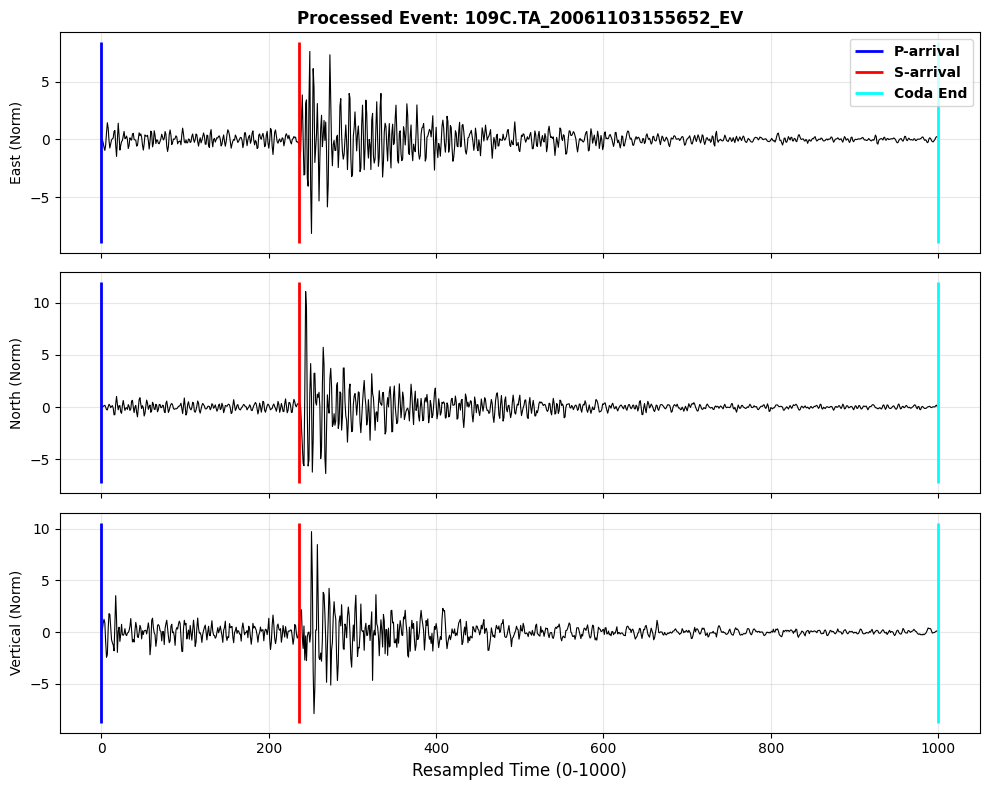

Plotting 109C.TA_20061129211102_EV (2/10)


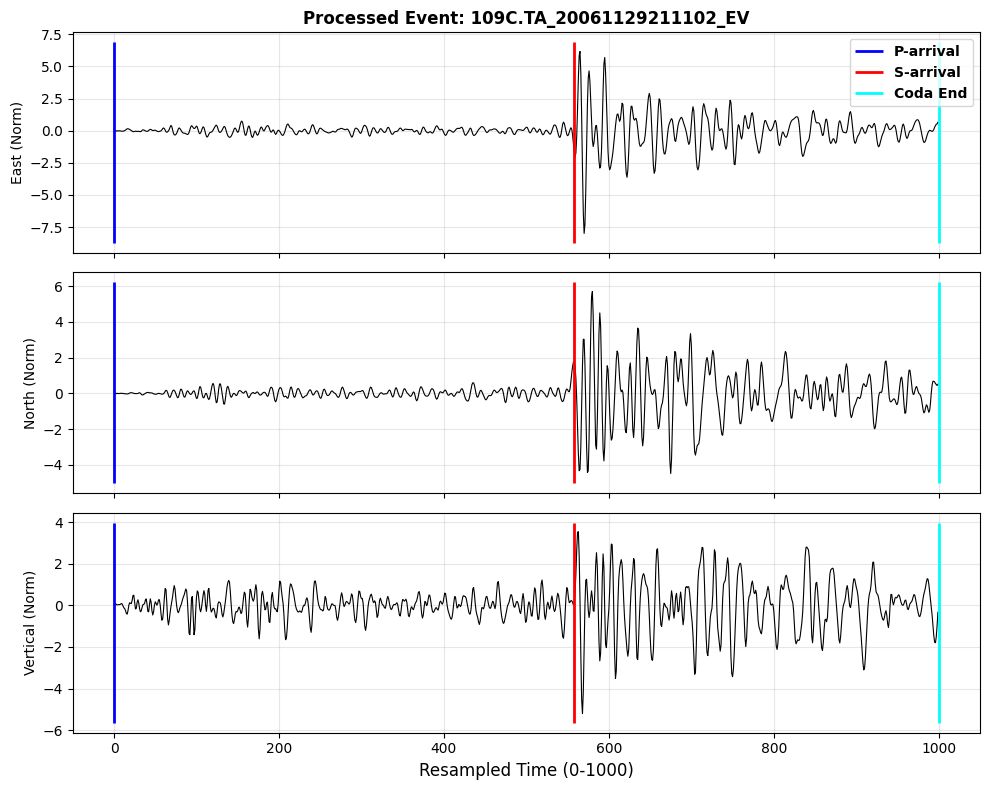

Plotting 109C.TA_20061129221547_EV (3/10)


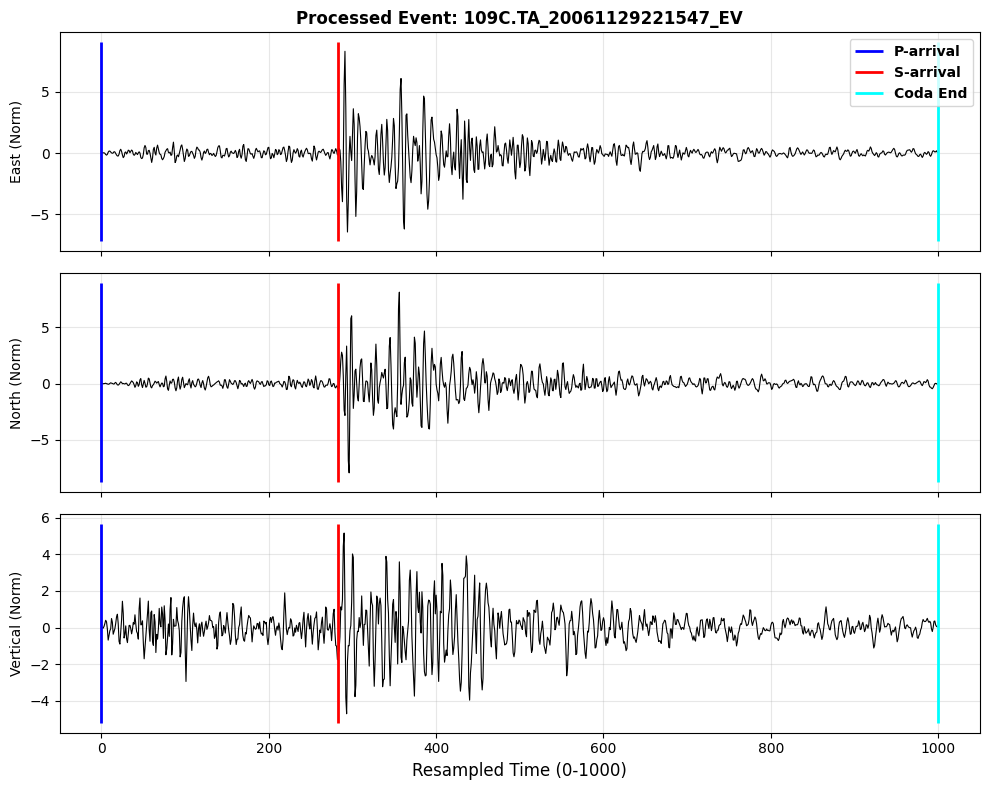

Plotting 109C.TA_20070209033349_EV (4/10)


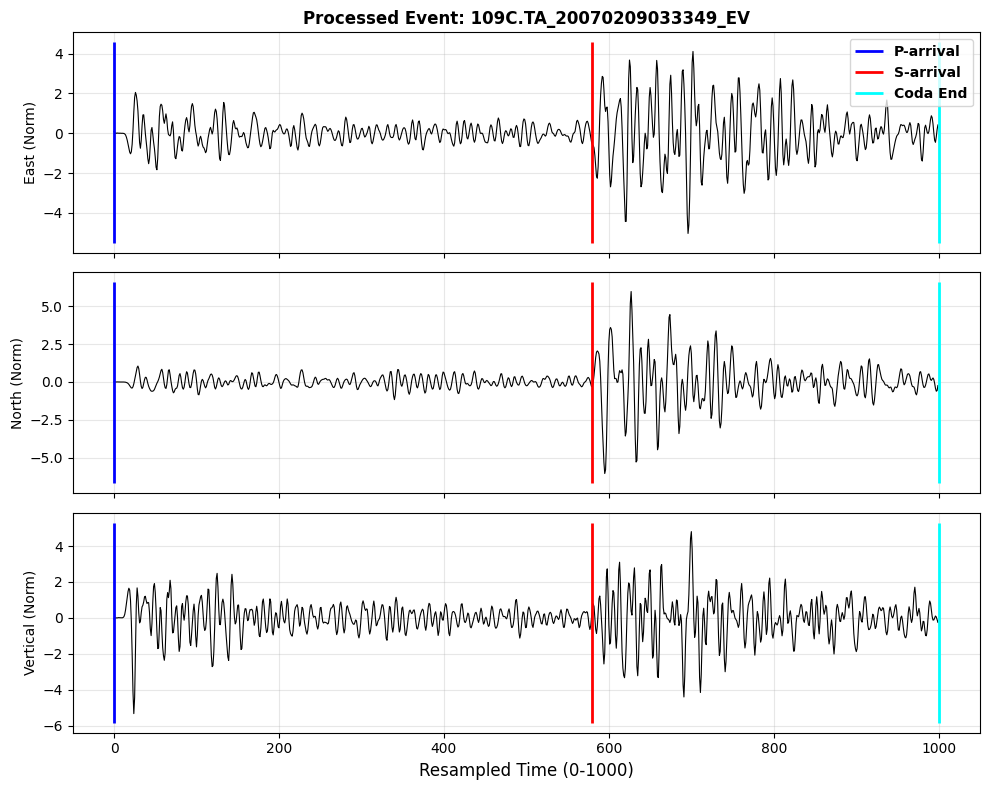

Plotting 109C.TA_20070415225732_EV (5/10)


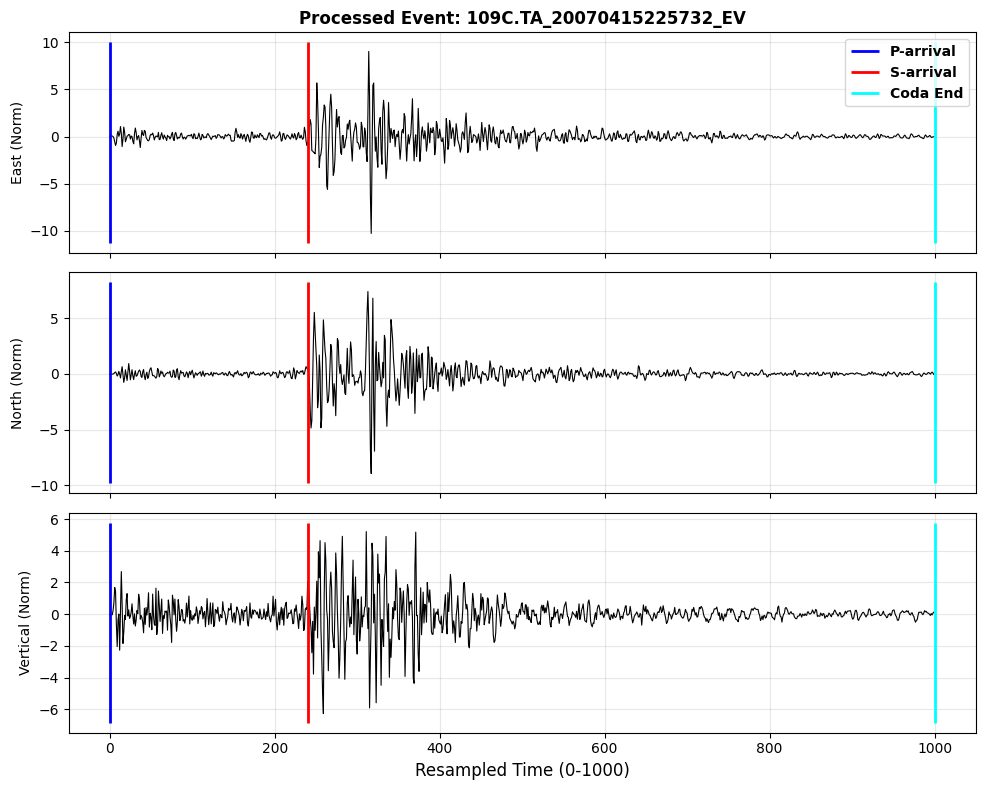

Plotting 109C.TA_20070904144754_EV (6/10)


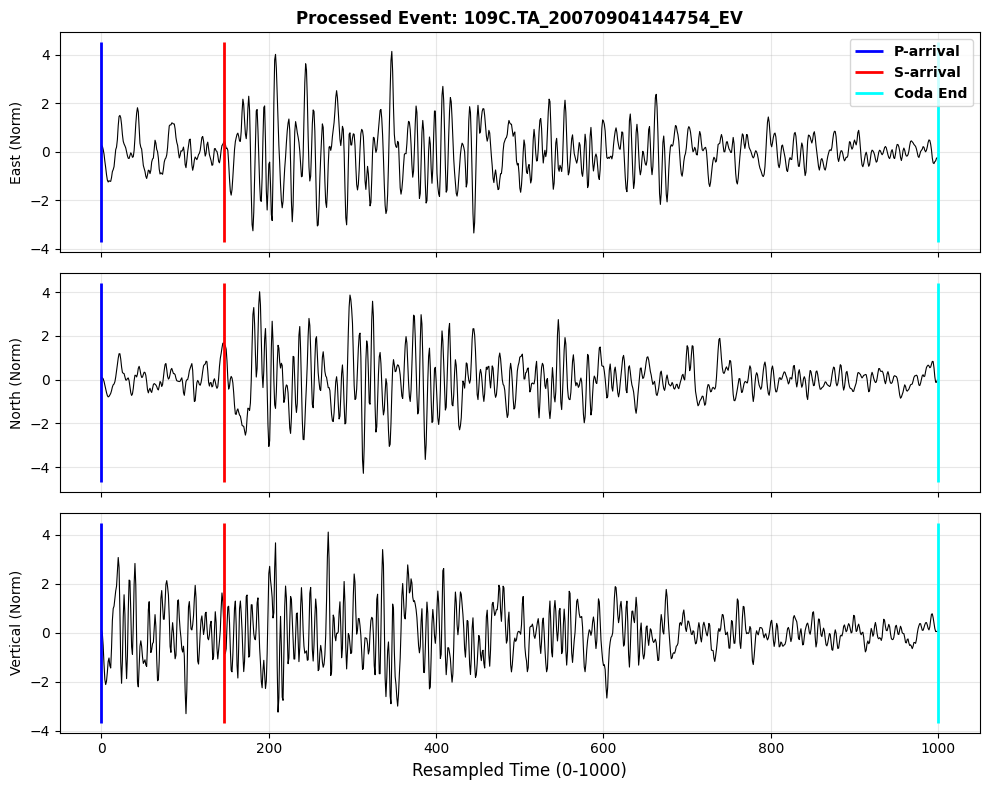

Plotting 109C.TA_20080509223813_EV (7/10)


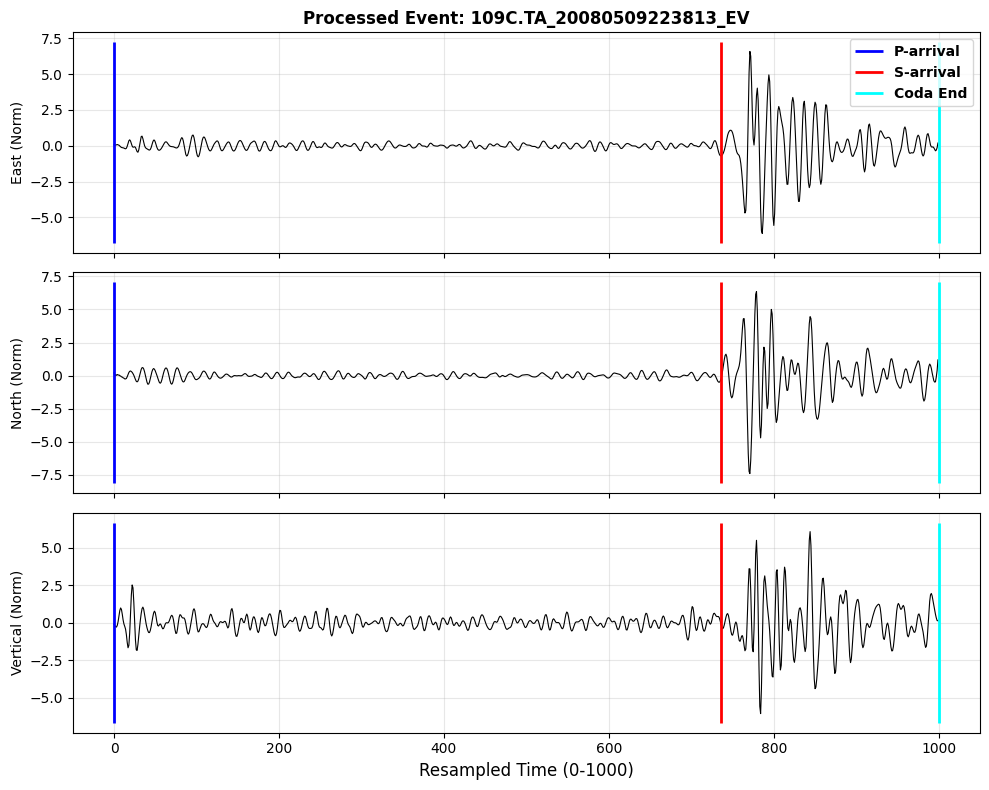

Plotting 109C.TA_20090129084207_EV (8/10)


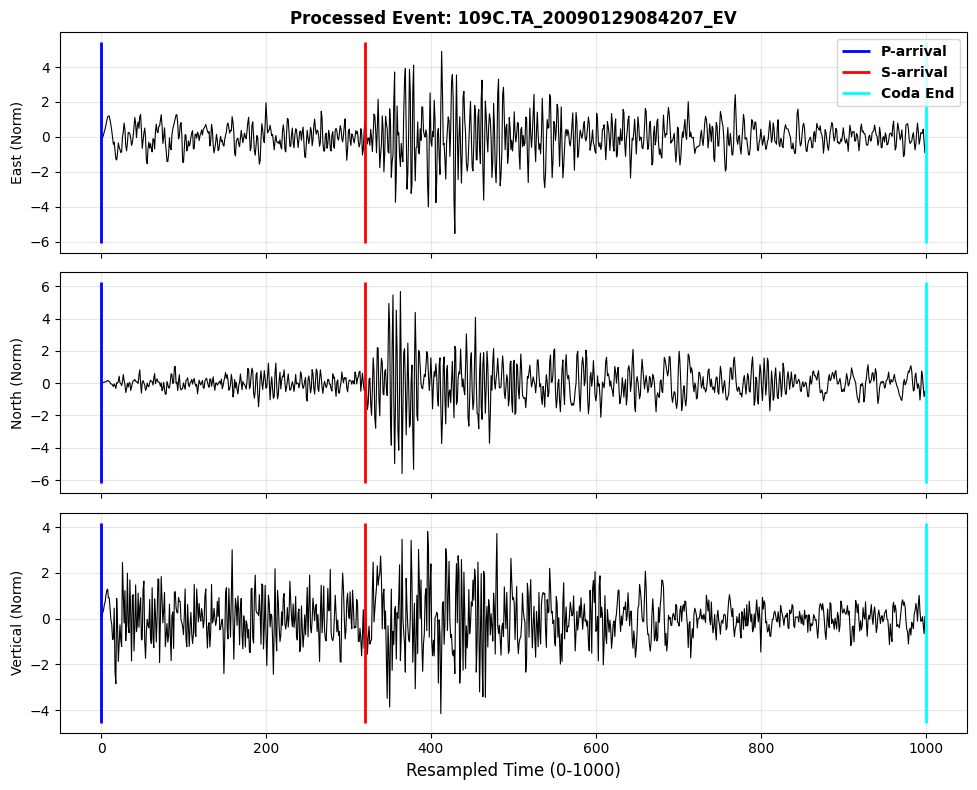

Plotting 109C.TA_20090416175534_EV (9/10)


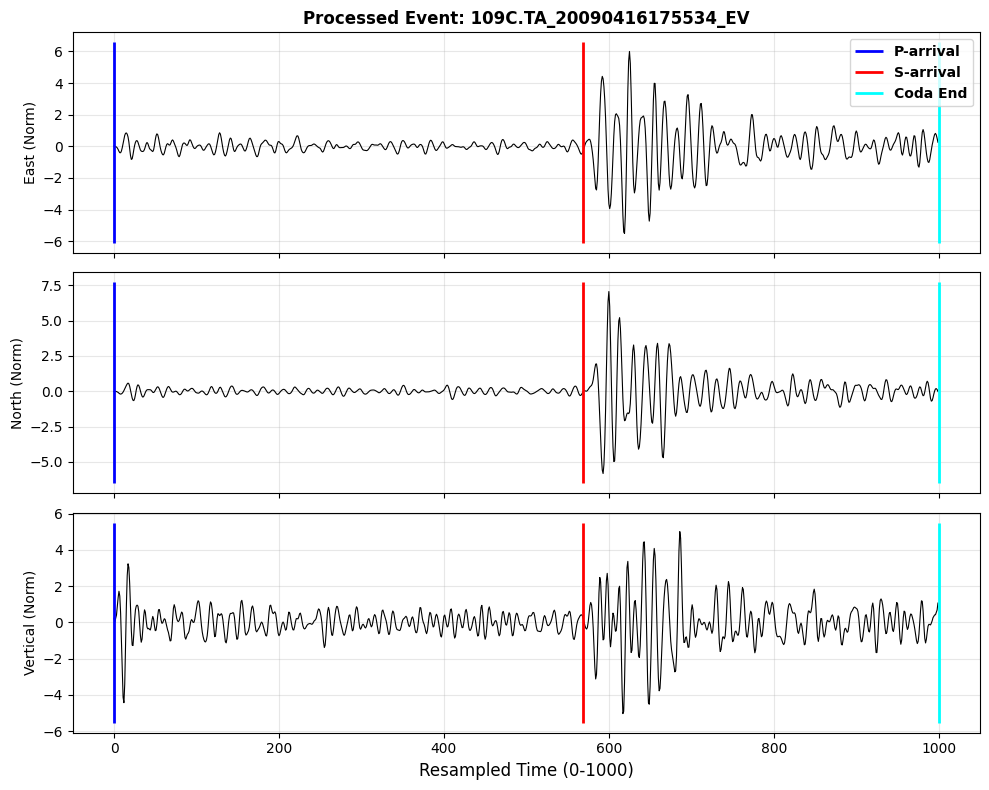

Plotting 109C.TA_20100201141955_EV (10/10)


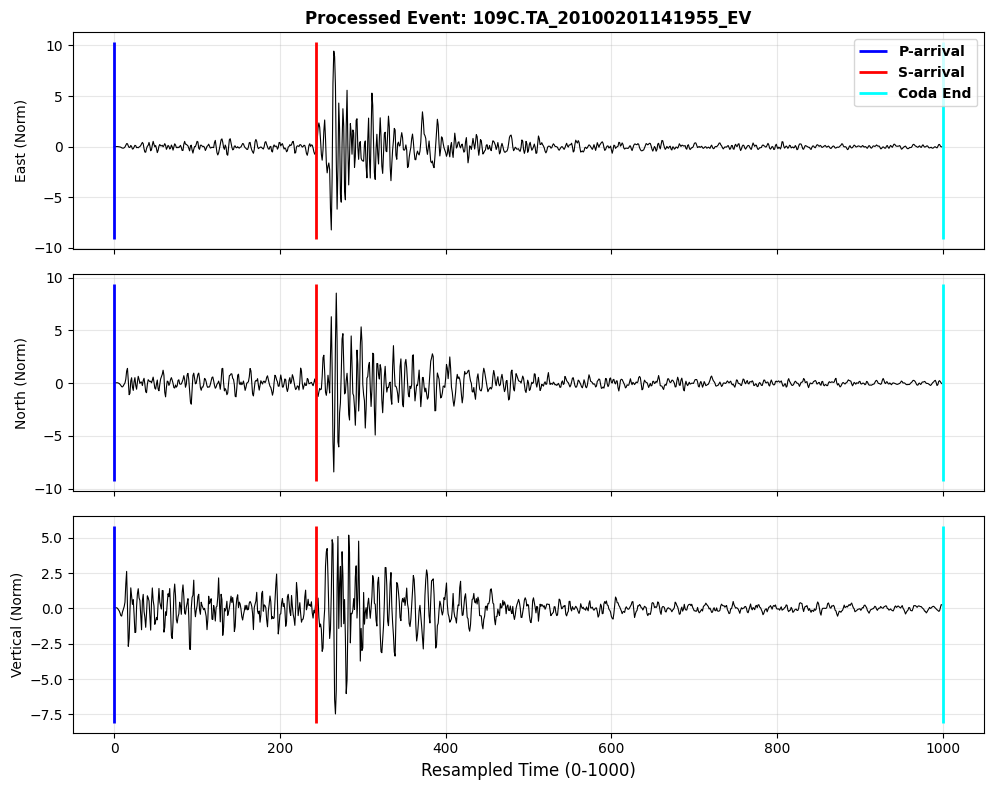

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# Assuming 'final_dataset' is your (N, 3, 1000) array from the preprocessing step
# Assuming 'final_df' is your filtered metadata dataframe

NUM_SAMPLES = 10

# --- FIX: CONVERT COLUMNS TO NUMERIC ---
# This forces the columns to be floats, fixing the 'UFuncTypeError'
cols_to_fix = ['p_arrival_sample', 's_arrival_sample', 'coda_end_sample']
for col in cols_to_fix:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# --- VISUALIZATION LOOP ---
print(f"Visualizing top {NUM_SAMPLES} processed signals...")

for i in range(min(NUM_SAMPLES, len(final_dataset))):
    
    # 1. Get the waveform data
    # Transpose from (3, 1000) -> (1000, 3) for plotting
    data = final_dataset[i].T 
    
    # 2. Get Metadata
    meta = final_df.iloc[i]
    trace_name = meta['trace_name']
    
    # 3. Calculate Relative S-Arrival Position
    p_orig = meta['p_arrival_sample']
    s_orig = meta['s_arrival_sample']
    coda_orig = meta['coda_end_sample']
    
    # Safety Check: If any value is NaN (missing), skip plotting markers
    if np.isnan(p_orig) or np.isnan(s_orig) or np.isnan(coda_orig):
        print(f"Skipping markers for {trace_name} (NaN in metadata)")
        s_new_index = 0 # Default fallback
    else:
        # Calculate fraction: (S - P) / (Coda - P)
        # This determines where S-arrival falls in our new 0-1000 timeline
        if (coda_orig - p_orig) == 0:
            s_fraction = 0
        else:
            s_fraction = (s_orig - p_orig) / (coda_orig - p_orig)
            
        s_new_index = int(s_fraction * 1000)
    
    print(f"Plotting {trace_name} ({i+1}/{NUM_SAMPLES})")

    # --- PLOTTING ---
    fig = plt.figure(figsize=(10, 8))
    
    # Loop to plot all 3 channels efficiently
    channel_names = ['East', 'North', 'Vertical']
    
    for ch_idx in range(3):
        ax = fig.add_subplot(3, 1, ch_idx + 1)
        plt.plot(data[:, ch_idx], 'k', linewidth=0.8)
        
        if ch_idx == 0:
            plt.title(f"Processed Event: {trace_name}", fontsize=12, fontweight='bold')
            
        ymin, ymax = ax.get_ylim()
        
        # Plot Markers
        pl = plt.vlines(0, ymin, ymax, color='b', linewidth=2, label='P-arrival')
        sl = plt.vlines(s_new_index, ymin, ymax, color='r', linewidth=2, label='S-arrival')
        cl = plt.vlines(1000, ymin, ymax, color='aqua', linewidth=2, label='Coda End')
        
        # Only add legend to the first plot to avoid clutter
        if ch_idx == 0:
            plt.legend(handles=[pl, sl, cl], loc='upper right', prop={'weight':'bold'})
            
        plt.ylabel(f'{channel_names[ch_idx]} (Norm)', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        if ch_idx < 2:
            ax.set_xticklabels([])
        else:
            plt.xlabel('Resampled Time (0-1000)', fontsize=12)

    plt.tight_layout()
    plt.show()

In [14]:
final_df['norm_s_arrival_sample_f'] = (final_df['s_arrival_sample'] - final_df['p_arrival_sample']) / (final_df['coda_end_sample'] - final_df['p_arrival_sample'])



In [16]:
final_df['norm_s_arrival_sample'] = final_df ['norm_s_arrival_sample_f'] * 1000

final_df['norm_s_arrival_sample'].head()

Unnamed: 0
235427    236.960065
235432    558.503697
235434    283.468104
235437    580.366226
235441    240.905416
Name: norm_s_arrival_sample, dtype: float64

In [17]:
final_df['norm_s_arrival_sample'] = final_df['norm_s_arrival_sample'].astype(int)

final_df['norm_s_arrival_sample'].head()

Unnamed: 0
235427    236
235432    558
235434    283
235437    580
235441    240
Name: norm_s_arrival_sample, dtype: int64

In [18]:
final_df.drop(columns = "norm_s_arrival_sample_f", inplace=True)

In [19]:
final_df

,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,...,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,id,norm_s_arrival_sample
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.88890,-117.1051,150.0,600.0,...,-116.0446,9.20,4.3,mb,101.34,281.7,[65. 65.5 61.40000153],5508,235427,236
235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.88890,-117.1051,150.0,900.0,...,-115.9531,2.10,4.1,ml,108.03,273.8,[55. 56.09999847 43.20000076],3199,235432,558
235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.88890,-117.1051,150.0,800.0,...,-115.9672,2.06,3.9,ml,106.69,273.7,[49. 48. 39.20000076],5252,235434,283
235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.88890,-117.1051,150.0,900.0,...,-116.1336,8.38,4.2,ml,98.93,246.8,[65. 68.19999695 58.70000076],2866,235437,580
235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.88890,-117.1051,150.0,900.0,...,-116.0594,6.61,4.3,ml,99.46,280.3,[60.09999847 64.80000305 53.40000153],5848,235441,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264972,YHH.WY_20150104073447_EV,WY,YHH,HH,2015-01-04 07:34:13.35,2015-01-04 07:34:48.270000,44.78833,-110.8505,2717.0,400.0,...,-114.2846,10.00,4.1,mb,272.97,84.4,[44.5 54.40000153 43.79999924],5900,1264972,622
1265330,YHL.WY_20140330123437_EV,WY,YHL,HH,2014-03-30 12:34:41.79,2014-03-30 12:34:38.860000,44.85090,-111.1830,2691.0,900.0,...,-110.6643,3.51,4.9,mw,42.01,282.5,[86.5 90.09999847 85.5 ],5900,1265330,109
1265331,YHL.WY_20140330123442_EV,WY,YHL,HH,2014-03-30 12:34:41.79,2014-03-30 12:34:43.860000,44.85090,-111.1830,2691.0,400.0,...,-110.6643,3.51,4.9,mw,42.01,282.5,[86.80000305 79.09999847 69.09999847],3097,1265331,202


In [23]:

temp = final_df['snr_db'].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# expand into new columns
final_df[["snr_db_E", "snr_db_N", "snr_db_V"]] = pd.DataFrame(temp.tolist(), index=final_df.index)

final_df.drop(columns="snr_db", inplace=True)

final_df.head()

,trace_name,network_code,receiver_code,receiver_type,source_origin_time,trace_start_time,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,...,source_magnitude,source_magnitude_type,source_distance_km,back_azimuth_deg,coda_end_sample,id,norm_s_arrival_sample,snr_db_E,snr_db_N,snr_db_V
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
235427,109C.TA_20061103155652_EV,TA,109C,BH,2006-11-03 15:56:42.73,2006-11-03 15:56:53.610000,32.8889,-117.1051,150.0,600.0,...,4.3,mb,101.34,281.7,5508,235427,236,65.000000,65.500000,61.400002
235432,109C.TA_20061129211102_EV,TA,109C,BH,2006-11-29 21:10:55.02,2006-11-29 21:11:03.890000,32.8889,-117.1051,150.0,900.0,...,4.1,ml,108.03,273.8,3199,235432,558,55.000000,56.099998,43.200001
235434,109C.TA_20061129221547_EV,TA,109C,BH,2006-11-29 22:15:38.65,2006-11-29 22:15:48.630000,32.8889,-117.1051,150.0,800.0,...,3.9,ml,106.69,273.7,5252,235434,283,49.000000,48.000000,39.200001
235437,109C.TA_20070209033349_EV,TA,109C,BH,2007-02-09 03:33:42.80,2007-02-09 03:33:50.600000,32.8889,-117.1051,150.0,900.0,...,4.2,ml,98.93,246.8,2866,235437,580,65.000000,68.199997,58.700001
235441,109C.TA_20070415225732_EV,TA,109C,BH,2007-04-15 22:57:25.78,2007-04-15 22:57:33.940000,32.8889,-117.1051,150.0,900.0,...,4.3,ml,99.46,280.3,5848,235441,240,60.099998,64.800003,53.400002


In [25]:
# Save the 3D array
np.save("signal_data/processed_seismic_data.npy", final_dataset)

# Save the filtered metadata (CRITICAL step, so rows match the data)
final_df.to_csv("metadata/processed_metadata.csv", index=False)

print("Saved .npy and .csv files successfully.")

Saved .npy and .csv files successfully.


### **Project Outline: Seismic Data Preprocessing Pipeline**

**1. Data Loading & Metadata Management**

  * Imported raw earthquake metadata (CSV) and waveform data (HDF5).
  * Merged and cleaned the metadata to ensure every event has a corresponding `trace_name`.
  * Created a consistent `final_sampled_metadata.csv` to track the subset of events being analyzed.

**2. Exploratory Data Analysis (EDA)**

  * **Duration Analysis:** Calculated and plotted histograms for:
      * **P-to-S Arrival:** The time difference between primary and secondary waves.
      * **Signal Duration (P-to-Coda):** The full event length from onset to decay.
  * **Justification for Resampling:** Identified that signal lengths vary significantly (min: \~354, max: \~5500 samples), necessitating a strategy to normalize lengths for pattern mining.

**3. Signal Preprocessing Pipeline (The Core)**
Implemented a robust loop to process 30,000+ signals with the following steps:

  * **Filtering:** Dropped signals shorter than 1000 samples to prevent "up-sampling" artifacts.
  * **Slicing:** Extracted the precise event window from **P-arrival** to **Coda-end**.
  * **Detrending:** Removed linear drift (DC offset) to correct sensor tilt.
  * **Resampling:** Compressed/stretched all variable-length signals to a fixed length of **1000 samples** to standardize the phase.
  * **Z-Normalization:** Normalized amplitude (Mean=0, Std=1) for each channel independently, ensuring magnitude invariance.

**4. Visualization & Verification**

  * **Coordinate Mapping:** Calculated the new "relative" position of the S-arrival on the 0-1000 scale.
  * **Plotting:** Visualized the final processed waveforms with markers:
      * **P-arrival:** Fixed at index 0.
      * **S-arrival:** Correctly mapped to its relative position.
      * **Coda End:** Fixed at index 1000.
  * Confirmed that the "Physics" (P before S) is preserved after resampling.

**5. Feature Engineering**

  * Parsed the `snr_db` (Signal-to-Noise Ratio) column from a string array into three separate numeric features: `snr_db_E`, `snr_db_N`, and `snr_db_V`.

**6. Output Generation**

  * Saved the final processed 3D tensor `(N_events, 3_channels, 1000_samples)` as a binary `.npy` file.
  * Saved the aligned metadata as a clean `.csv` file for the next stage (Pattern Mining).